# Analisis dan Implementasi Algoritma Betweenness Centrality untuk Deteksi Komunitas pada Dataset Twitter

Mencari user terpenting dalam dataset Twitter dengan kata kunci 'somethinc'.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plot
import math
import csv
import taudata_sna
from taudata_sna import Centrality

In [2]:
# create blank graph

G = nx.Graph()

In [3]:
G

In [4]:
file = 'edge_list/edge_list.txt'

reader = csv.reader(open(file, 'rt'), delimiter = ' ')
for line in reader:
    G.add_edge(line[0], line[1], weight=int(line[2]))

In [5]:
nx.number_of_nodes(G)

12466

In [6]:
nx.number_of_edges(G)

20257

In [7]:
nx.number_of_selfloops(G)

0

In [8]:
"""
Density adalah ukuran
seberapa erat hubungan antar node dalam
suatu network
"""

nx.density(G) 

0.0002607268263861417

artinya apabila kita mengambil dua node secara acak, maka kemungkinan dua node tersebut terhubung adalah sebesar 0.00026

### Connected Components

Bagian dari jaringan yang tidak terhubung antara satu dan yang lain.

<img src='cc.png' style='width:600px;height:300px'/>

In [9]:
# returns the number of connected components

nx.number_connected_components(G)

761

In [10]:
# generate a sorted list of connected components

cc = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
cc[:10]

[10683, 21, 12, 12, 9, 7, 6, 6, 6, 6]

In [11]:
gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(gcc[0])

In [12]:
len(G0)

10683

The somethinc network contains 12466 nodes, but the network is split into over 761 component. There is one giant component of size ~10000

In [27]:
degree = nx.degree(G0)

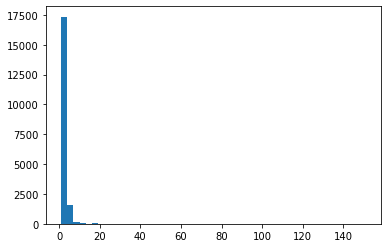

In [13]:
weights = [edata['weight'] for f, t, edata in G0.edges(data=True)]
hist = plot.hist(weights, 50)

### Island Method

<img src='island_method.png' style='width:400px;height:400px'/>

In [14]:
def trim_edges(G, weight=1):
    """
    Remove edges with weights less then a threshold parameter ("weight")
    """
    g2 = nx.Graph()
    for f, to, edata in G.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, weight={edata['weight']})
    return g2

In [15]:
def island_method(g, iterations =5):
    weights = [edata['weight'] for f,to,edata in G.edges(data = True)]
    
    mn = (int(min(weights)))
    mx = (int(max(weights)))
    
    # compute the size of the step, so we get a reasonable step in iterations
    step = int((mx-mn)/iterations)
    
    return[[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [16]:
islands = island_method(G0)

for i in islands:
    print(i[0], len(i[1]), nx.number_connected_components(i[1]))

1 8088 171
31 14 3
61 2 1
91 2 1
121 2 1


In [17]:
g2 = trim_edges(G0)

In [18]:
nx.number_of_edges(g2)

11190

In [19]:
nx.number_of_nodes(g2)

8088

In [20]:
g2 = trim_edges(G0, weight=2)

In [21]:
len(g2)

3076

In [22]:
g2 = trim_edges(G0, weight=3)
len(g2)

1581

In [36]:
g2 = trim_edges(G0, weight=5)
len(g2)

482

In [23]:
cc = [len(c) for c in sorted(nx.connected_components(g2), key=len, reverse=True)]
cc[:5]

[1454, 7, 4, 4, 3]

In [24]:
g3 = sorted(nx.connected_components(g2), key=len, reverse=True)
G1 = G.subgraph(g3[0])
len(G1)

1454

In [25]:
nx.number_of_edges(G1)

4140

In [36]:
print(G1.edges(data=True))

[('savinacahya', 'beauthingy', {'weight': 25}), ('Dutiduttt', 'sukaskincarean', {'weight': 5}), ('Dutiduttt', 'Somethinc4u', {'weight': 1}), ('ghsyaghfrii', 'sukaskincarean', {'weight': 5}), ('ghsyaghfrii', 'Somethinc4u', {'weight': 1}), ('ghsyaghfrii', 'lakijugaskinca1', {'weight': 2}), ('ghsyaghfrii', 'nanaskinjourney', {'weight': 1}), ('annisachooo', 'sukaskincarean', {'weight': 2}), ('annisachooo', 'ngalamfess', {'weight': 4}), ('happymenola', 'sukaskincarean', {'weight': 3}), ('happymenola', 'Somethinc4u', {'weight': 1}), ('happymenola', 'skinicee_', {'weight': 1}), ('happymenola', 'skincarecaca', {'weight': 1}), ('happymenola', 'cicamatcha', {'weight': 4}), ('happymenola', 'skingoldenhour', {'weight': 2}), ('trlestelle', 'somethinc', {'weight': 2}), ('trlestelle', 'pyooyoyoyoyo', {'weight': 4}), ('vnyfe', 'sukaskincarean', {'weight': 5}), ('vnyfe', 'Somethinc4u', {'weight': 5}), ('vnyfe', 'lakijugaskinca1', {'weight': 1}), ('vnyfe', 'skincarebysya', {'weight': 2}), ('ewapabinggow

In [37]:
edges = nx.to_pandas_edgelist(G1)
edges

,source,target,weight
0,savinacahya,beauthingy,25
1,Dutiduttt,sukaskincarean,5
2,Dutiduttt,Somethinc4u,1
3,ghsyaghfrii,sukaskincarean,5
4,ghsyaghfrii,Somethinc4u,1
...,...,...,...
4135,xabrinagrae,CHinvite_,4
4136,daissychoco,moonlightsoo12,2
4137,adindabrilli,skingameofc,1
4138,amaliamrudina,orchidpoison,4


In [41]:
df = pd.DataFrame(edges, columns=['source', 'target', 'weight'])
print(df)

             source          target  weight
0       savinacahya      beauthingy      25
1         Dutiduttt  sukaskincarean       5
2         Dutiduttt     Somethinc4u       1
3       ghsyaghfrii  sukaskincarean       5
4       ghsyaghfrii     Somethinc4u       1
...             ...             ...     ...
4135    xabrinagrae       CHinvite_       4
4136    daissychoco  moonlightsoo12       2
4137   adindabrilli     skingameofc       1
4138  amaliamrudina    orchidpoison       4
4139     mahlrscool    orchidpoison       2

[4140 rows x 3 columns]


In [43]:
df.to_csv(r'edge_list/cc_edge_list.csv', sep = ' ', index = False, header = False)

In [25]:
def sorted_degree(g):
    ds = sorted(g.degree, key=lambda x: x[1], reverse=True)
    #d = nx.degree(g)
    #ds = sorted(d.items(), key=lambda k, v: (-v, k))
    return ds

In [26]:
ds = sorted_degree(G1)
ds[:10]

[('sukaskincarean', 691),
 ('Somethinc4u', 680),
 ('ohmybeautybank', 494),
 ('ngalamfess', 247),
 ('beauthingy', 132),
 ('nanaskinjourney', 122),
 ('avoskinbeauty', 112),
 ('delicciuus', 96),
 ('skincarefess', 95),
 ('JUALAN_BASE', 91)]

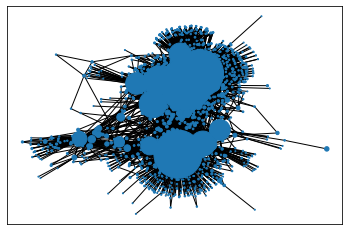

In [28]:
pos = nx.spring_layout(G1)
ns = [degree[n] for n in G1.nodes()]
nx.draw_networkx(G1,pos=pos,node_size=ns, with_labels=False)

In [29]:
Centrality(G1, N=10, method='betweeness', outliers=False, Label = True, layOut='shells')

Influencial Users: ['ohmybeautybank', 'sukaskincarean', 'Somethinc4u', 'JUALAN_BASE', 'beauthingy', 'skincarefess', 'Naimutss', 'ngalamfess', 'awskinterest', 'Skincare_IDN']
Influencial Users Scores: [0.42223704 0.40975264 0.26333389 0.07017857 0.06740984 0.03622868
 0.02942489 0.01969921 0.01550313 0.01406628]


In [30]:
Centrality(G1, N=10, method='eigen', outliers=False, Label = True, layOut='shells')

Influencial Users: ['sukaskincarean', 'Somethinc4u', 'ngalamfess', 'ohmybeautybank', 'nanaskinjourney', 'avoskinbeauty', 'skincarecaca', 'skingoldenhour', 'delicciuus', 'glowithelle']
Influencial Users Scores: [0.45024361 0.44521644 0.15522508 0.14300233 0.11691623 0.09326523
 0.09292519 0.08382571 0.08232197 0.07271164]
